# Мобильные приложения — Анализ поведения пользователей в мобильном приложении

**ЦЕЛЬ РАБОТЫ:**   
Провести анализ действий пользователей. Выявить закономерности, понять их происхождение. Дать рекомендации на основе анализа, для того чтобы достичь увеличения конверсии в целевое событие - просмотр контакта.   
  

### **Описание данных:**

Датасет содержит данные о событиях, совершенных в мобильном приложении "Ненужные вещи". В нем пользователи продают свои ненужные вещи, размещая их на доске объявлений.

В датасете содержатся данные пользователей, впервые совершивших действия в приложении после 7 октября 2019 года.

Колонки в *mobile_sources.csv*: 

- `userId` — идентификатор пользователя,
- `source` — источник, с которого пользователь установил приложение.

Колонки в *mobile_dataset.csv*: 

- `event.time` — время совершения,
- `user.id` — идентификатор пользователя,
- `event.name` — действие пользователя.

Виды действий:

- `advert_open` — открыл карточки объявления,
- `photos_show` — просмотрел фотографий в объявлении,
- `tips_show` — увидел рекомендованные объявления,
- `tips_click` — кликнул по рекомендованному объявлению,
- `contacts_show` и `show_contacts` — посмотрел номер телефона,
- `contacts_call` — позвонил по номеру из объявления,
- `map` — открыл карту объявлений,
- `search_1`—`search_7` — разные действия, связанные с поиском по сайту,
- `favorites_add` — добавил объявление в избранное.

## Предобработка данных  
1.1 Проверить пропуски, дубликаты и типы данных  
1.2 Добавить отдельный столбец date, привести к одному формату столбец event.time   
1.3 Переименовать столбцы в обоих датафремах  
1.4 Объединить события search_1—search_7; contacts_show и show_contacts    
  
## Исследовательский анализ  
2.1 Выявить период, которым мы располагаем. Найти максимальную и минимальную дату  
2.2 Посмотреть на распределение событий по дням  
2.3 Посмотрим на частоту событий по числу уникальных пользователей совершивших это событие. А также посчитаем долю от общего числа пользователей.  
2.4 Делаем сессии из лога событий. Определяем время на каждое событие.  
2.5 Сравнить конверсию воронки взаимодействия, с основными карточками, с помощью search до целевого действия (contacts_show)  
2.6 Сравнить конверсию воронки, с основными карточками, с помощью tips_click до целевого действия (contacts_show)  
2.7 Изучить динамику количества взаимодействий в приложении по дням и неделям.      
  
       
  
## Проверка статистических гипотез  
3.1 Одни пользователи совершают действия tips_show и tips_click, другие — только tips_show.  
Проверить гипотезу: **конверсия в contacts_show различается у этих двух групп.**    
3.2 Проверьте гипотезу: **конверсия в contacts_show между теми пользователями, которые совершили установку приложения, исходя из источника(yandex или google) различается.**  
  
## Общий вывод
4.1 Вывод на основании исследования и рекомендации
  
## Материалы   
5.1 Ссылка на презентацию. 

##  Дашборд  

1. Набор №1  
    * Постройте диаграмму распределения количества событий по типу события.  
    * Добавьте индикатор количества пользователей.  
    * Добавьте фильтр дашборда по дате совершения события.  
2. Набор №2  
    * Постройте диаграмму, отображающую количество событий по дням.  
    * Постройте гистограмму, отображающую количество пользователей, пришедших из разных источников.  
    * Добавьте фильтр дашборда по типу события.  

In [90]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import datetime as dt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import math as mth
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)


In [91]:
df_1 = pd.read_csv('/Users/datasets/mobile_dataset.csv')
df_2 = pd.read_csv('/Users/datasets/mobile_sourсes.csv')

In [92]:
df_1

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c
...,...,...,...
74192,2019-11-03 23:53:29.534986,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74193,2019-11-03 23:54:00.407086,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74194,2019-11-03 23:56:57.041825,search_1,20850c8f-4135-4059-b13b-198d3ac59902
74195,2019-11-03 23:57:06.232189,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9


In [93]:
df_2

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google
...,...,...
4288,b86fe56e-f2de-4f8a-b192-cd89a37ecd41,yandex
4289,424c0ae1-3ea3-4f1e-a814-6bac73e48ab1,yandex
4290,437a4cd4-9ba9-457f-8614-d142bc48fbeb,yandex
4291,c10055f0-0b47-477a-869e-d391b31fdf8f,yandex


# Предобработка данных  

In [94]:
print('Количество дубликатов в датафрейме 1:', df_1.duplicated().sum())
print('Количество дубликатов в датафрейме 2:', df_2.duplicated().sum())

Количество дубликатов в датафрейме 1: 0
Количество дубликатов в датафрейме 2: 0


In [95]:
df_1.columns =['date_time', 'event_name', 'user_id']
df_2.columns = ['user_id', 'source']

In [96]:
if set(df_1['user_id']) == set(df_2['user_id']):
    print('Множества идентификаторов в обоих датасетах совпадают +++')
else:
    print('Множества не совпадают ---')

Множества идентификаторов в обоих датасетах совпадают +++


In [97]:
df_mobile = df_1.merge(df_2, on='user_id', how='left')
df_mobile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 0 to 74196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date_time   74197 non-null  object
 1   event_name  74197 non-null  object
 2   user_id     74197 non-null  object
 3   source      74197 non-null  object
dtypes: object(4)
memory usage: 2.8+ MB


In [98]:
df_mobile['date_time'] = pd.to_datetime(df_mobile['date_time'], format='%Y-%m-%d %H:%M:%S')
df_mobile['date_time'] = df_mobile['date_time'].dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64')
df_mobile['date'] = pd.to_datetime(df_mobile['date_time'], format='%Y-%m-%d')
df_mobile['date'] = df_mobile['date'].dt.strftime('%Y-%m-%d').astype('datetime64')
df_mobile

,date_time,event_name,user_id,source,date
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07
...,...,...,...,...,...
74192,2019-11-03 23:53:29,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google,2019-11-03
74193,2019-11-03 23:54:00,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google,2019-11-03
74194,2019-11-03 23:56:57,search_1,20850c8f-4135-4059-b13b-198d3ac59902,google,2019-11-03
74195,2019-11-03 23:57:06,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google,2019-11-03


In [99]:
print('Количество пропусков в столбцах датафрейма:', df_mobile.isna().sum())

Количество пропусков в столбцах датафрейма: date_time     0
event_name    0
user_id       0
source        0
date          0
dtype: int64


In [100]:
df_mobile['event_name'].value_counts()

tips_show        40055
photos_show      10012
advert_open      6164 
contacts_show    4450 
map              3881 
search_1         3506 
favorites_add    1417 
search_5         1049 
tips_click       814  
search_4         701  
contacts_call    541  
search_3         522  
search_6         460  
search_2         324  
search_7         222  
show_contacts    79   
Name: event_name, dtype: int64

Объединим похожие события в одно, такие как: contacts_show и show_contacts, search_1 — search_7. Это не ошибка, но скорее всего связано с человеческим фактором заполнения данных. 

In [101]:
def replace(raw):
    if raw =='show_contacts':
        return 'contacts_show'
    elif 'search' in raw:
        return 'search'
    return raw
df_mobile['event_name'] = df_mobile['event_name'].apply(replace)
df_mobile

,date_time,event_name,user_id,source,date
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07
...,...,...,...,...,...
74192,2019-11-03 23:53:29,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google,2019-11-03
74193,2019-11-03 23:54:00,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google,2019-11-03
74194,2019-11-03 23:56:57,search,20850c8f-4135-4059-b13b-198d3ac59902,google,2019-11-03
74195,2019-11-03 23:57:06,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google,2019-11-03


Провела предобработку данных, попсмотрела пропуски и дубликаты, переменовала столбцы, и почистила данне для лучшего анализа в столбце 'event_name'. Данные готовы к исследовательскому анализу.

# Исследовательский анализ

2.1 Выявить период, которым мы располагаем. Найти максимальную и минимальную дату

In [102]:
print('Минимальная дата события:', df_mobile['date_time'].min())
print('Максимальная дата события:', df_mobile['date_time'].max())

Минимальная дата события: 2019-10-07 00:00:00
Максимальная дата события: 2019-11-03 23:58:12


2.2 Посмотреть на распределение событий по дням

In [103]:
print('Кол-во событий -', df_mobile['event_name'].count())
print('Кол-во событий которое совершает один пользователь за день -', round(df_mobile.groupby('user_id')['event_name'].count().mean(), 1))

Кол-во событий - 74197
Кол-во событий которое совершает один пользователь за день - 17.3


In [104]:
events = df_mobile.groupby(['date', 'event_name']).agg({'date_time':'count'}).reset_index()
events.columns = ['date', 'event_name', 'event_count']
counting = events.groupby('date').agg({'event_count':'sum'})['event_count'].reset_index()
counting.columns = ['date', 'event_sum']
events = events.merge(counting, on='date', how='left')

In [105]:
fig_events = px.bar(events, x='date', y='event_count', color='event_name', 
                    title='Распределение событий') 
fig_events.update_xaxes(title_text='Дата')
fig_events.update_yaxes(title_text='Количество') 
fig_events.show()

График наглядно показывает приимущество одного события, стоит посмотреть на распределение без учета рекомендованных объявлений. Cобытие tips_show, это автоматическое событие, котороые не отражает взаимодействие с приложением.

In [106]:
fig_events_2 = px.bar(events.query('event_name !="tips_show"'), x='date', y='event_count', color='event_name', 
                    title='Распределение событий без рекомендаций') 
fig_events_2.update_xaxes(title_text='Дата')
fig_events_2.update_yaxes(title_text='Количество') 
fig_events_2.show()


**Вывод:**  
  
* Низкая конверсия перехода от tips_click к tips_show  говорит нам, что пользователи чаще всего пользуются самостоятельным поиском объвлений на сайте.  
* Заметно возрастрает карточка события map в дни первой регистрации пользователей, у первой недели максимальное кол-во просмотра размещенных объявлений 8 октября, есть небольшие всплески до прежнего уровня 21октября и 28октября, но динамика заметно падает после 28октября, что логично, так как динамика этого события зависит от количества пришедших новых пользователей.
* Пользователи не часто добавяют объявления в избранное, в диапозоне от 16 до 120.
* Самый низкий показатель у cоntacts_call, но брать в учет это не стоит, ведь пользователь может просто сохранить номер и позвонить потом, поэтому событие звонков через приложение может быть с низким проникновением.


2.3 Посмотрим на частоту событий по числу уникальных пользователей совершивших это событие. А также посчитаем долю от общего числа пользователей.

In [107]:
events_by_user = df_mobile.query('event_name !="tips_show"').groupby('event_name')['user_id'].agg(['count', 'nunique']).reset_index()
events_by_user.columns =['event_name', 'n_events', 'n_users']
events_by_user
n_users = {'all': df_mobile['user_id'].nunique()}


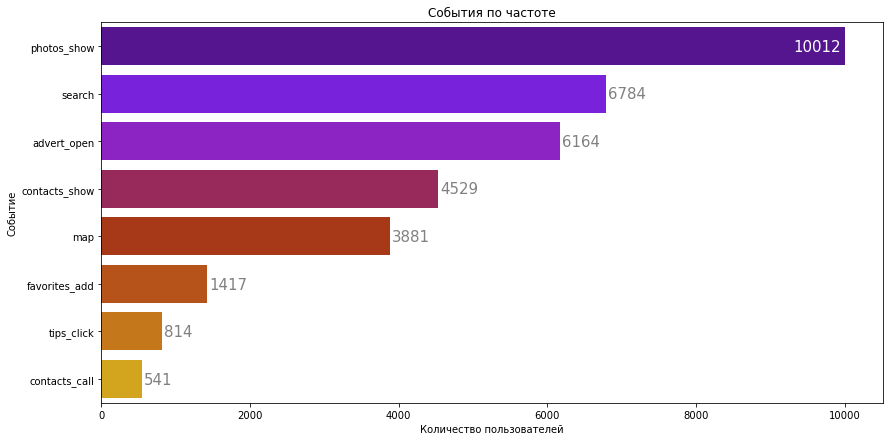

In [108]:
plt.figure(figsize=(14, 7))
order = events_by_user.sort_values('n_events', ascending=False).reset_index(drop=True)['event_name']

ax = sns.barplot(y='event_name', x='n_events', order = order,  data=events_by_user, palette='gnuplot')
ax.set_title('События по частоте')
for i in ax.patches:
    if i.get_width() > 10000:
        ax.text(i.get_width()-700, i.get_y()+0.5, 
                str(int(i.get_width())), fontsize=15, color='white')
    else:
        ax.text(i.get_width()+30, i.get_y()+0.5, 
                str(int(i.get_width())), fontsize=15, color='grey')
plt.xlabel('Количество пользователей')
plt.ylabel('Событие')
plt.show()

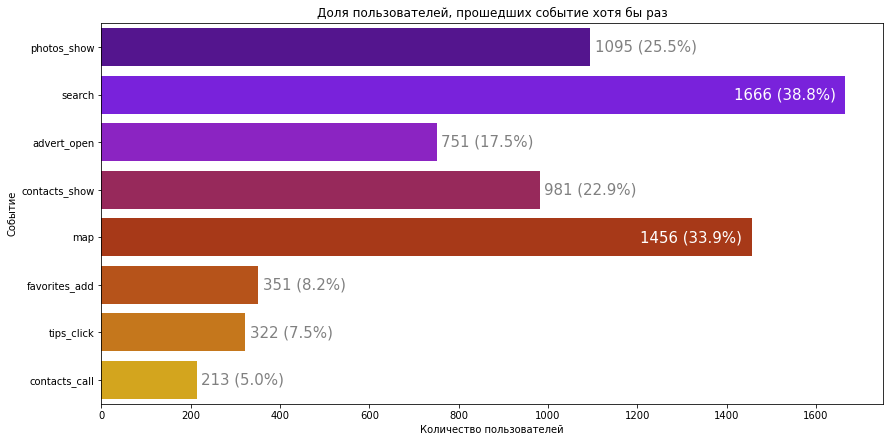

In [109]:
plt.figure(figsize=(14, 7))

ax = sns.barplot(y='event_name', x='n_users', order = order,  data=events_by_user, palette='gnuplot')
ax.set_title('Доля пользователей, прошедших событие хотя бы раз')
for i in ax.patches:
    if i.get_width() > 1200:
        ax.text(i.get_width()-250, i.get_y()+0.5, 
            str(int(i.get_width()))+' ({:.1%})'.format(i.get_width() / n_users['all']), fontsize=15, color='white')
    else:
        ax.text(i.get_width()+10, i.get_y()+0.5, 
            str(int(i.get_width()))+' ({:.1%})'.format(i.get_width() / n_users['all']), fontsize=15, color='grey')
plt.xlabel('Количество пользователей')
plt.ylabel('Событие')
plt.show()

**Вывод:**   
Наше целевое событие происходило 4529 раз, но лишь 22.9% уникальных пользователей кликнули на просмотр контактов.   Однако более половины уникальных пользователей, которые пользовались поиском, конвертировались в целевое событие.     Пользователи, которые используют поиск, конвертируются несомненно активнее.  
  
Также я бы отметила пользователей, которые смотрели карту объявлений, их достаточно много, но связывать их с невысокой конвертацией в целевое я бы не стала, ведь пользователей может не устраивать дальность дороги за вещью. Однако стоит обратить внимание, что дальность дороги несомненно влияет на сам звонок.   
  
Пользователи много кликают на фотографии, но в тоже время конвертация уникальных пользователей в разы меньше, я бы обратила внимание, на количество фотографий в объявлении, на просмотр может уходить большое количество времени и они не доходят до целевого события. Возможно стоит поставить ограничение на количество выкладываемых фотографий.

2.4 Делаем сессии из лога событий. Определяем время отведенное на каждое событие.

Для удобства отсортируем события по user_id, тогда события каждого пользователя будут идти последовательно. В колонке ’diff’ для каждого события отдельного пользователя посчитаем разницу между временем посещения страницы и временем посещения предыдущей страницы. 

In [110]:
df_mobile = df_mobile.sort_values('user_id')
df_mobile['diff'] = df_mobile.groupby('user_id')['date_time'].diff()
df_mobile['id'] = df_mobile.index
df_mobile.head()

,date_time,event_name,user_id,source,date,diff,id
805,2019-10-07 13:39:45,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,NaT,805
6565,2019-10-09 18:40:28,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-09,2 days 05:00:43,6565
6566,2019-10-09 18:42:22,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-09,0 days 00:01:54,6566
36486,2019-10-21 20:07:30,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-21,12 days 01:25:08,36486
37607,2019-10-22 11:30:52,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-22,0 days 15:23:22,37607


Из основного датафрейма создадим вспомогательный. Этот датафрейм будет содержать события, которые будут считаться первыми событиями сессий. К таким событиям относятся все события, которые произошли спустя более чем 30 минут после предыдущего, либо события, которые были первыми для пользователя (NaT в колонке ’diff’). Также создадим во вспомогательном датафрейме колонку ’session_id’, которая будет содержать в себе id первого события сессии. Она пригодится, чтобы корректно отобразить идентификатор сессии, когда будем объединять данные из основного и вспомогательного датафреймов.

In [111]:
df_session_start = df_mobile[(df_mobile['diff'].isnull()) | (df_mobile['diff'] > '1800 seconds')]
df_session_start['session_id'] = df_session_start.index
df_session_start.head()

,date_time,event_name,user_id,source,date,diff,id,session_id
805,2019-10-07 13:39:45,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,NaT,805,805
6565,2019-10-09 18:40:28,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-09,2 days 05:00:43,6565,6565
36486,2019-10-21 20:07:30,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-21,12 days 01:25:08,36486,36486
37607,2019-10-22 11:30:52,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-22,0 days 15:23:22,37607,37607
37571,2019-10-22 11:21:30,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-22,14 days 21:40:59,37571,37571


С помощью функции merge_asof объединим между собой данные основного и вспомогательного датафреймов. Эта функция позволяет объединить данные двух датафреймов схожим образом с левым join’ом, но не по точному соответствию ключей, а по ближайшему. 

In [112]:
df_mobile = df_mobile.sort_values('id')
df_session_start = df_session_start.sort_values('id')
df_mobile = pd.merge_asof(df_mobile, df_session_start[['id','user_id','session_id']], on='id',by='user_id')
df_mobile.head()

,date_time,event_name,user_id,source,date,diff,id,session_id
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,-1 days +23:59:59,0,NaN
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,-1 days +23:49:19,1,NaN
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07,-1 days +23:20:14,2,NaN
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,-1 days +23:58:40,3,NaN
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07,-4 days +03:55:05,4,NaN


In [113]:
df_mobile = df_mobile.sort_values(['user_id','date_time'])

Найдем события, которые были первыми в сессиях. И вычислим время, проведенное на странице, руководствуясь временем посещения следующей страницы.

In [114]:
df_mobile['is_first_event_in_session'] = df_mobile['id'] == df_mobile['session_id']
df_mobile.head()

,date_time,event_name,user_id,source,date,diff,id,session_id,is_first_event_in_session
805,2019-10-07 13:39:45,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,NaT,805,805.0,True
806,2019-10-07 13:40:31,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,-15 days +02:14:58,806,805.0,False
809,2019-10-07 13:41:05,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,-15 days +02:22:51,809,805.0,False
820,2019-10-07 13:43:20,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,0 days 00:02:15,820,805.0,False
830,2019-10-07 13:45:30,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,0 days 00:02:10,830,805.0,False


In [115]:
df_mobile['time_on_page'] = df_mobile.groupby(['session_id'])['date_time'].diff(1)
df_mobile['time_on_page'] = df_mobile.groupby(['session_id'])['time_on_page'].shift(-1)
df_mobile.head()

,date_time,event_name,user_id,source,date,diff,id,session_id,is_first_event_in_session,time_on_page
805,2019-10-07 13:39:45,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,NaT,805,805.0,True,0 days 00:00:46
806,2019-10-07 13:40:31,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,-15 days +02:14:58,806,805.0,False,0 days 00:00:34
809,2019-10-07 13:41:05,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,-15 days +02:22:51,809,805.0,False,0 days 00:02:15
820,2019-10-07 13:43:20,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,0 days 00:02:15,820,805.0,False,0 days 00:02:10
830,2019-10-07 13:45:30,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,0 days 00:02:10,830,805.0,False,0 days 00:00:13


In [116]:
#df_mobile['diff'] = df_mobile['diff'].astype('timedelta64[m]')

In [117]:
df_mobile['time_on_page'] = df_mobile['time_on_page']/np.timedelta64(1, 's')
df_mobile

,date_time,event_name,user_id,source,date,diff,id,session_id,is_first_event_in_session,time_on_page
805,2019-10-07 13:39:45,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,NaT,805,805.0,True,46.0
806,2019-10-07 13:40:31,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,-15 days +02:14:58,806,805.0,False,34.0
809,2019-10-07 13:41:05,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,-15 days +02:22:51,809,805.0,False,135.0
820,2019-10-07 13:43:20,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,0 days 00:02:15,820,805.0,False,130.0
830,2019-10-07 13:45:30,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,0 days 00:02:10,830,805.0,False,13.0
...,...,...,...,...,...,...,...,...,...,...
72584,2019-11-03 15:51:23,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03,22 days 14:42:28,72584,72584.0,True,NaN
72589,2019-11-03 15:51:57,contacts_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03,22 days 14:43:54,72589,72589.0,True,NaN
72684,2019-11-03 16:07:40,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03,16 days 03:44:20,72684,72684.0,True,38.0
72688,2019-11-03 16:08:18,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03,0 days 00:00:38,72688,72684.0,False,7.0


In [118]:
#display(df_mobile[df_mobile['diff']==0.0])

In [119]:
#df_mobile = df_mobile.drop(df_mobile[df_mobile['diff']==0.0].index).reset_index()

In [120]:
print('Количество пользователей: ',df_mobile['user_id'].nunique())
print('Количество сессий: ', df_mobile['session_id'].nunique())
print('Количество просмотров страниц: ', df_mobile['id'].count())
print('Среднее время просмотра страницы: ',df_mobile['time_on_page'].mean())

Количество пользователей:  4293
Количество сессий:  18481
Количество просмотров страниц:  74197
Среднее время просмотра страницы:  7322.150315313902


Среднее время просмотра страницы необычно большое, явный показатель присутсвия выбросов, посмотрим поподробнее и избавимся от них.

In [121]:
df_mobile['time_on_page'].describe()

count    3.187300e+04
mean     7.322150e+03
std      6.427770e+04
min      0.000000e+00
25%      2.100000e+01
50%      6.400000e+01
75%      1.510000e+02
max      2.253118e+06
Name: time_on_page, dtype: float64

In [122]:
print(f"Среднее время = {df_mobile['time_on_page'].mean()} \nМедианное время = {df_mobile['time_on_page'].median()}")
print(f"Максимальное время = {df_mobile['time_on_page'].max()}")


Среднее время = 7322.150315313902 
Медианное время = 64.0
Максимальное время = 2253118.0


In [123]:
df_mobile[df_mobile['time_on_page'] > 1800].sort_values('time_on_page').tail(20)

,date_time,event_name,user_id,source,date,diff,id,session_id,is_first_event_in_session,time_on_page
22270,2019-10-16 11:40:35,photos_show,a7fa4378-20cc-4bde-a9f4-aa54405c8322,other,2019-10-16,0 days 15:03:10,22270,22270.0,True,1133008.0
12071,2019-10-12 16:07:02,tips_show,95e6817d-7b08-4943-b363-133f86e1840e,other,2019-10-12,0 days 00:00:24,12071,12067.0,False,1145001.0
22474,2019-10-16 12:32:30,tips_show,cfa52a1d-f9e7-4a1c-807e-799e525e6250,yandex,2019-10-16,-15 days +23:58:30,22474,22421.0,False,1204601.0
13107,2019-10-12 22:50:33,photos_show,4fef9c5d-9bb0-4df4-a476-54e92c44a4b0,google,2019-10-12,0 days 22:07:51,13107,13107.0,True,1253148.0
21212,2019-10-15 21:39:21,tips_show,64821486-e7f8-4204-933b-96f8388ab177,google,2019-10-15,NaT,21212,21212.0,True,1300215.0
22003,2019-10-16 09:58:39,tips_show,5c288f90-c2fa-4403-9823-4bd0efaefc46,other,2019-10-16,0 days 00:02:21,22003,21946.0,False,1303533.0
10135,2019-10-11 14:11:00,tips_show,dd281955-685d-40ff-9f09-8d159b01818f,yandex,2019-10-11,-16 days +02:05:12,10135,10128.0,False,1374888.0
18249,2019-10-14 20:34:17,tips_show,4d85f388-8bd9-4f18-b23f-6f2d5602eb3c,google,2019-10-14,-16 days +00:26:39,18249,18235.0,False,1380801.0
16740,2019-10-14 12:44:16,tips_click,e01cf554-2f0e-473b-9933-bed623a19782,yandex,2019-10-14,NaT,16740,16740.0,True,1392707.0
10449,2019-10-11 15:49:41,photos_show,6263c230-0378-4989-9db2-b02b3ff5e8be,yandex,2019-10-11,NaT,10449,10449.0,True,1394773.0


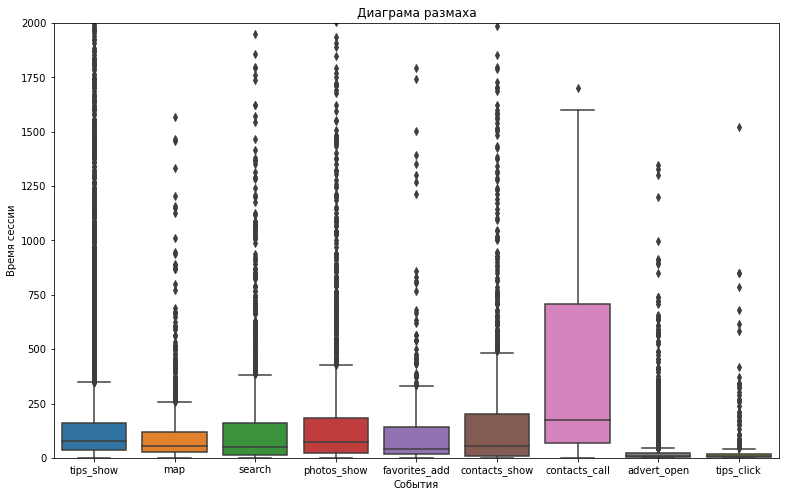

In [124]:
plt.figure(figsize=(13,8))
sns.boxplot(data=df_mobile, x='event_name', y='time_on_page')
plt.title('Диаграма размаха')
plt.xlabel('События')
plt.ylabel('Время сессии')
plt.ylim(0, 2000)
plt.show()

Учитывая разницу среднего и медианного значений, максимальное время просмотра, а также boxplot  - конкретное значение усредненно так как время довольно "плавно" возрастает от нескольких секунд до 26 дней.   
В датасете присутсвуют выбросы с показателями в 2253118.0 млн секунд - 26 дней. Boxplot наглядно показывает, что выбросы начинаются от 370-400 секунд, выделяется лишь contacts_call, но данное событие не является целевым, поэтому стоит убрать выбросы.     
Хорошей статистикой для суммирования выборки негауссовых распределений данных является Interquartile Range, или IQR для краткости.  
  
IQR рассчитывается как разница между 75-м и 25-м процентилями данных и определяет прямоугольник на графике прямоугольника и вискера.  

In [125]:
column = ['time_on_page']

Q1 = df_mobile[column].quantile(0.25)
Q3 = df_mobile[column].quantile(0.75)
IQR = Q3 - Q1

df_mobile = df_mobile[~((df_mobile[column] < (Q1 - 1.5 * IQR)) |(df_mobile[column] > (Q3 + 1.5 * IQR))).any(axis=1)]

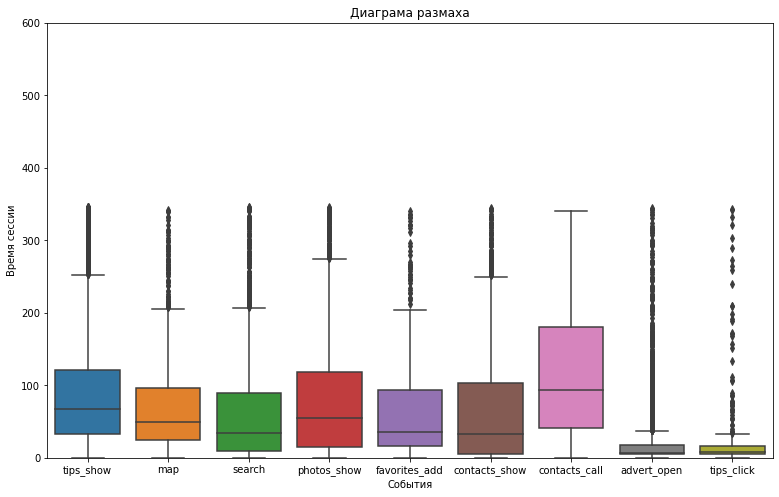

In [126]:
plt.figure(figsize=(13,8))
sns.boxplot(data=df_mobile, x='event_name', y='time_on_page')
plt.title('Диаграма размаха')
plt.xlabel('События')
plt.ylabel('Время сессии')
plt.ylim(0, 600)
plt.show()

In [127]:
print('Количество пользователей: ',df_mobile['user_id'].nunique())
print('Количество сессий: ', df_mobile['session_id'].nunique())
print('Количество просмотров страниц: ', df_mobile['id'].count())
print('Среднее время просмотра страницы: ',df_mobile['time_on_page'].mean())
print('Медианное время просмотра страницы: ',df_mobile['time_on_page'].median())
print('Максимальное время просмотра страницы: ',df_mobile['time_on_page'].max())

Количество пользователей:  4293
Количество сессий:  18481
Количество просмотров страниц:  70452
Среднее время просмотра страницы:  75.3377417519909
Медианное время просмотра страницы:  52.0
Максимальное время просмотра страницы:  346.0


Другое дело, разница среднего, максимального и медианы уже не пугающая. Можно анализировать дальше.

Рассчитаем среднее времени от первого действия до Целевого(показ контактов). Добавим столбец с названием первого события.

In [128]:
df_mobile_show = df_mobile.query('event_name == "contacts_show"').groupby('user_id')['date_time'].min().reset_index()
df_mobile_show.columns = ['user_id', 'time_first_contacts_show']
user_first_event = df_mobile.groupby('user_id')['date_time'].min().reset_index()

In [129]:
def event_min(row):
    l = (df_mobile.loc[(df_mobile['user_id']==row['user_id']) & (df_mobile['date_time']==row['date_time']),'event_name']).values
    return l[0]
    
user_first_event['first_event'] = user_first_event.apply(event_min, axis=1)
user_first_event

,user_id,date_time,first_event
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45,tips_show
1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19 21:34:33,search
2,00463033-5717-4bf1-91b4-09183923b9df,2019-11-01 13:54:35,photos_show
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-18 22:14:05,search
4,00551e79-152e-4441-9cf7-565d7eb04090,2019-10-25 16:44:41,contacts_show
...,...,...,...
4288,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,2019-10-13 16:11:27,map
4289,ffc01466-fdb1-4460-ae94-e800f52eb136,2019-10-07 20:32:49,photos_show
4290,ffcf50d9-293c-4254-8243-4890b030b238,2019-10-23 11:51:35,tips_show
4291,ffe68f10-e48e-470e-be9b-eeb93128ff1a,2019-10-21 16:39:33,search


Присоеденим вторую таблицу к первой и найдём разницу во времени

In [130]:
df_mobile_show = df_mobile_show.merge(user_first_event, on='user_id', how='left')
df_mobile_show.columns = ['user_id', 'time_first_contacts_show', 'time_first_event', 'first_event']
df_mobile_show['delta_time'] = df_mobile_show['time_first_contacts_show'] - df_mobile_show['time_first_event']
df_mobile_show

,user_id,time_first_contacts_show,time_first_event,first_event,delta_time
0,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-20 19:17:18,2019-10-19 21:34:33,search,0 days 21:42:45
1,00551e79-152e-4441-9cf7-565d7eb04090,2019-10-25 16:44:41,2019-10-25 16:44:41,contacts_show,0 days 00:00:00
2,005fbea5-2678-406f-88a6-fbe9787e2268,2019-10-11 11:22:54,2019-10-11 11:22:54,contacts_show,0 days 00:00:00
3,007d031d-5018-4e02-b7ee-72a30609173f,2019-10-22 13:08:09,2019-10-22 13:02:26,map,0 days 00:05:43
4,00a93a72-3bbc-4ee7-8a81-7134f45ae009,2019-10-11 15:38:12,2019-10-11 15:38:12,contacts_show,0 days 00:00:00
...,...,...,...,...,...
947,fee3ba1c-16f4-46f7-bf56-4bf80cc4e2f5,2019-10-26 12:13:19,2019-10-26 11:43:11,search,0 days 00:30:08
948,ff1554b5-919e-40b1-90bb-ee1f7f6d5846,2019-10-21 10:59:23,2019-10-21 08:28:33,photos_show,0 days 02:30:50
949,ffc01466-fdb1-4460-ae94-e800f52eb136,2019-10-07 20:33:42,2019-10-07 20:32:49,photos_show,0 days 00:00:53
950,ffe68f10-e48e-470e-be9b-eeb93128ff1a,2019-10-22 16:07:17,2019-10-21 16:39:33,search,0 days 23:27:44


Проверим все ли события явдяются "contacts_show" там где "delta_time" = "0 days 00:00:00"

In [131]:
df_mobile_show.sort_values(by='delta_time')
df_mobile_show.query('delta_time =="0 days 00:00:00"')['first_event'].value_counts()

contacts_show    183
Name: first_event, dtype: int64

Да, все верно, мы видим наше целевое событие.  
  
Из таблицы и проверки видно, что есть пользователи у которых "delta_time" равно 0. Это значит первым событием было "contacts_show". Возможно это произошло из-за того, что у нас срез данных и первое своё действие (когда и какое мы не узнаем) пользователь совершил за пределами (раньше) предоставленной нам информации (чтобы дойти до целевого события пользователь должен совершить перед ним хотя бы еще одно действие. Поэтому, чтобы не искажать средний результат надо этих пользователей отбросить.

In [132]:
df_mobile_show = df_mobile_show.query('delta_time !="0 days 00:00:00"').reset_index(drop=True)
df_mobile_show.head()

,user_id,time_first_contacts_show,time_first_event,first_event,delta_time
0,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-20 19:17:18,2019-10-19 21:34:33,search,0 days 21:42:45
1,007d031d-5018-4e02-b7ee-72a30609173f,2019-10-22 13:08:09,2019-10-22 13:02:26,map,0 days 00:05:43
2,01556e76-d389-43bd-9fc7-1a3ba9802f49,2019-10-10 16:09:38,2019-10-10 16:09:12,photos_show,0 days 00:00:26
3,01585246-7d9b-4e03-a465-095d5b891b0a,2019-10-17 16:21:56,2019-10-17 16:20:58,search,0 days 00:00:58
4,035ae717-a6ae-4569-b952-16be9447832b,2019-10-27 16:58:12,2019-10-27 16:52:54,tips_show,0 days 00:05:18


In [133]:
print(f"Среднее время = {df_mobile_show['delta_time'].mean()} \nМедианное время = {df_mobile_show['delta_time'].median()}")


Среднее время = 1 days 12:31:53.239271781 
Медианное время = 0 days 00:22:20


Слишком большая разница между средним и медианой. Посмотрим распределение времени на гистограмме.  

Чтобы построить гистограмму переведем время в секунды и разделим на 60 (будет время в минутах).

In [134]:
df_mobile_show['delta_time'].describe()

count    769                      
mean     1 days 12:31:53.239271781
std      3 days 12:25:52.016625543
min      0 days 00:00:07          
25%      0 days 00:04:40          
50%      0 days 00:22:20          
75%      0 days 22:05:06          
max      23 days 04:20:38         
Name: delta_time, dtype: object

In [135]:
delta_minutes = round(df_mobile_show['delta_time'].dt.total_seconds()/60, 1)
delta_minutes

0      1302.8
1      5.7   
2      0.4   
3      1.0   
4      5.3   
      ...    
764    30.1  
765    150.8 
766    0.9   
767    1407.7
768    6511.6
Name: delta_time, Length: 769, dtype: float64

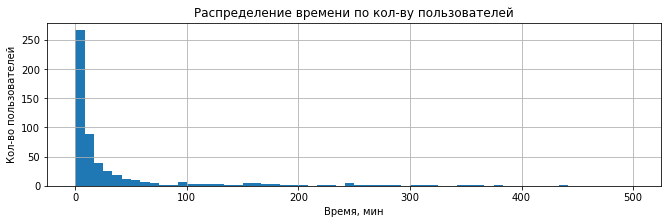

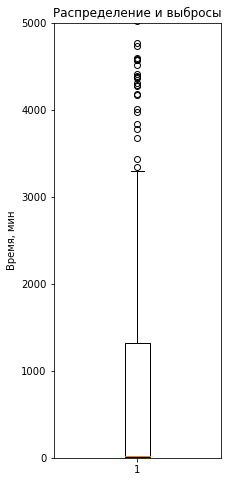

In [136]:
delta_minutes.hist(figsize=(11,3),bins=60, range=(0,500));
plt.title('Распределение времени по кол-ву пользователей')
plt.ylabel('Кол-во пользователей')
plt.xlabel('Время, мин');
plt.show()

plt.figure(figsize=(3,8))
plt.title('Распределение и выбросы')
plt.ylabel('Время, мин');
plt.boxplot(delta_minutes)
plt.ylim(0,5000);

In [137]:
for perc in range(5,100,5):
    print(f"{perc}-й процентиль = {round(np.percentile(delta_minutes, perc),1)} минут")


5-й процентиль = 0.7 минут
10-й процентиль = 1.2 минут
15-й процентиль = 2.0 минут
20-й процентиль = 3.2 минут
25-й процентиль = 4.7 минут
30-й процентиль = 6.1 минут
35-й процентиль = 8.6 минут
40-й процентиль = 11.2 минут
45-й процентиль = 15.3 минут
50-й процентиль = 22.3 минут
55-й процентиль = 34.7 минут
60-й процентиль = 60.5 минут
65-й процентиль = 162.5 минут
70-й процентиль = 579.0 минут
75-й процентиль = 1325.1 минут
80-й процентиль = 2703.5 минут
85-й процентиль = 4577.4 минут
90-й процентиль = 7785.6 минут
95-й процентиль = 13295.6 минут


На лицо присуствие выбросов  
Среднее время = 1 день 12:31:53   
Медианное время = 0 дней 00:22:20  

Напишем функцию которая поможет создать новый датафрейм с колонками : пользователь / событие перед целевым / время (в принципе поля время и пользователь необязательны, но вдруг понадобятся.). Событие перед целевым - не может быть целевым ("contacts_show", в таблице попадаются случаи когда идут 2 целевых подряд, поэтому мы берем первое) и не "contacts_call"(так как воронка идет : событие -> "contacts_show" -> "contacts_call)

In [138]:
def events_before(id):
    
    one_user = df_mobile[df_mobile['user_id']==id].sort_values(by='date_time').reset_index() 

    global prev_cs
    event = ''
    prev_index = 0
    
    for index in one_user.index:

        if (one_user.loc[index,'event_name']=='contacts_show' and event!='' and event!='contacts_call' and one_user.loc[prev_index,'event_name']!='contacts_show'):
            one_user['time_cont_show'] = one_user.loc[index,'date_time']
            prev_cs = prev_cs.append(one_user.loc[prev_index,['user_id', 'date_time', 'event_name', 'time_cont_show']]) #, ignore_index=True)

        event = one_user.loc[index,'event_name']
        prev_index = index
    
prev_cs = pd.DataFrame()

df_mobile_show['user_id'].apply(events_before)

prev_cs.sample(5)

,user_id,date_time,event_name,time_cont_show
12,79a7b52a-8949-4e58-8cb4-8727181a6ddd,2019-10-10 13:55:01,tips_show,2019-10-10 13:55:42
48,9a8f5b68-87a6-4468-93e1-2130d5de0e63,2019-10-31 08:21:32,tips_show,2019-10-31 08:21:34
118,955bd7b0-8da8-49df-adee-546b59347634,2019-10-14 15:01:38,tips_show,2019-10-14 15:01:42
17,f5bc9d6e-5ea1-4576-b360-4e93872e7ef3,2019-10-08 09:10:22,tips_show,2019-10-08 09:10:36
5,2aefc667-34b3-43f1-bd19-da65c4435bf1,2019-10-09 10:22:31,tips_show,2019-10-09 10:22:49


Создадим еще 2 столбца: "delta_time" - время между событием и ЦС, "delta_time_sec" - тоже но в секундах.

In [139]:
prev_cs['delta_time'] = prev_cs['time_cont_show'] - prev_cs['date_time']
prev_cs['delta_time_sec'] = prev_cs['delta_time'].dt.total_seconds()
display(prev_cs.sample(4))

,user_id,date_time,event_name,time_cont_show,delta_time,delta_time_sec
5,b4f5ac30-e3cd-46fc-afd6-b03a4aaca117,2019-10-30 10:18:11,tips_show,2019-10-30 10:23:59,0 days 00:05:48,348.0
16,b5ef76f6-d1fc-4721-b8cc-72ac8a9a795b,2019-10-27 16:25:56,photos_show,2019-10-27 16:26:32,0 days 00:00:36,36.0
34,e0d5e097-f7c3-4a93-8488-e5b6f1a61d15,2019-10-21 17:18:22,tips_show,2019-10-21 17:19:35,0 days 00:01:13,73.0
55,30e902a0-0e4c-444e-822b-3a7254ee89d8,2019-10-20 15:09:16,tips_show,2019-10-20 15:11:35,0 days 00:02:19,139.0


In [140]:
print('Сколько времени (в секундах) проходит между ЦС и предыдущим \n')
print(prev_cs.groupby('event_name')['delta_time_sec'].median().sort_values().round())


Сколько времени (в секундах) проходит между ЦС и предыдущим 

event_name
advert_open      42.0  
map              58.0  
favorites_add    64.0  
tips_show        64.0  
photos_show      110.0 
search           125.0 
tips_click       1803.0
Name: delta_time_sec, dtype: float64


Если усреднить, то между ЦС и предыдущим проходит от 0,7 до 30 минут. Самым "быстрым" событием, в плане конверсии в ЦС, является "advert_open" - 42 секунды, а сымым медленным "tips_click" - 1803 секунды.

2.5 Сравнить конверсию воронки взаимодействия, с основными карточками, с помощью search до целевого действия (contacts_show)

In [141]:
tips_click = df_mobile.query('event_name == "tips_click"')
tips_click_user_list = tips_click['user_id'].unique().tolist()
search = df_mobile.query('event_name == "search"')
search_user_list = search['user_id'].unique().tolist()

search_funnel = df_mobile.query('user_id not in @tips_click_user_list')
search_funnel = search_funnel.query('user_id in @search_user_list')
search_funnel =  search_funnel.query('event_name == "advert_open" or event_name == "contacts_call" or event_name == "contacts_show" or event_name == "favorites_add" or event_name == "search"')
search_funnel_count = search_funnel['event_name'].value_counts().to_frame().reset_index()['event_name'].to_list()
search_funnel_name = search_funnel['event_name'].value_counts().to_frame().reset_index()['index'].to_list()

fig_search = go.Figure()
fig_search.add_trace(go.Funnel(
    y = search_funnel_name,
    x = search_funnel_count,
    textposition = "auto",
    textinfo = "value+percent initial+percent previous",
    opacity = 0.70, marker = {"color": ["darkgoldenrod", "gold", "khaki", "beige", "ivory"]},
    textfont = {"size": 13, "color": "black"}
))
fig_search.update_layout(title='Воронка взаимодействий пользователей посредством поиска')
fig_search.show()

**Вывод:**  
* После поиска по сайту 47% пользователей открывают карточку объявления,
** А после открытия карточки объявления 42% пользователей просматривают контакты и 20% от общего количества поисковых действий.   
* После открытия карточки объявления 63% пользователей добавляют объявление в избранное и 13% от общего количества поисковых действий.  
* Пользователи, которые звонять по номеру телефона, составляют 30% от количества добавленных объявлений в избранное, то есть 1/3 пользователей возвращаются к объявлениям добавленным в избранное. И всего 4% пользователей звонят по номеру телефона от общего количества поисковых действий.  

2.6 Сравнить конверсию воронки, с основными карточками, с помощью tips_click до целевого действия (contacts_show)  
Oтследим конверсию в целевое contacts_show, а так же contacts_call и favorites_add.

In [142]:
tips_click_funnel = df_mobile.query('user_id not in @search_user_list')
tips_click_funnel = tips_click_funnel.query('user_id in @tips_click_user_list')
tips_click_funnel = tips_click_funnel.query('event_name =="tips_click" or event_name == "contacts_show" or event_name =="contacts_call" or event_name =="favorites_add" or event_name =="tips_show"')
tips_click_funnel_count = tips_click_funnel['event_name'].value_counts().to_frame().reset_index()['event_name'].to_list()
tips_click_funnel_name = tips_click_funnel['event_name'].value_counts().to_frame().reset_index()['index'].to_list()

fig = go.Figure()
fig.add_trace(go.Funnel(
    y = tips_click_funnel_name,
    x = tips_click_funnel_count,
    textposition = "auto",
    textinfo = "value+percent initial+percent previous",
    opacity = 0.70, marker = {"color": ["teal", "lightseagreen", "turquoise", "paleturquoise"]},
    textfont = {"size": 13, "color": "black"}
))
fig.update_layout(title='Воронка взаимодействий пользователей посредством рекомендации')
fig.show()

**Вывод:**  
* Конечно если смотреть на показатели в целом конверсия перехода пользователей с рекомендации до открытия рекомендованного оставляет желать лучшего: из 5641 пользователей только 650 кликнуло по объявлению.  
** Выявили интересную закономерность, те пользователи, которые пользовались рекомендациями не взаимодействовали в дальнейшем с карточкой contacts_call.  
* Всего лишь 12% пользователей увидивших карточку tips_show перешли на карточку tips_click.  
* Из 650 пользователей перешедших на рекомендованное объявление 480(74%) посмотрели контакт - это отличный показатель, по этому пути не отвалилось большого количества пользователей. Возможно стоит это учесть, и повысить качество показанных рекомендаций, чтобы увеличить данную конверсию перехода изначально.  
* Так же 25% пользователей добавили объявление в избранное - это 2% от показанного объявления. 

2.7 Изучить динамику количества взаимодействий в приложении по дням и неделям.

In [143]:
first_activity_date = df_mobile.groupby(['user_id'])['date'].min()
first_activity_date.name = 'first_activity_date'
user_activity = df_mobile.join(first_activity_date,on='user_id')

In [144]:
user_activity['activity_week'] = pd.to_datetime(user_activity['date'], 
                                                unit='d') - pd.to_timedelta(user_activity['date'].dt.dayofweek, unit='d')
user_activity['first_activity_week'] = pd.to_datetime(user_activity['first_activity_date'],
                                                      unit='d') - pd.to_timedelta(user_activity['first_activity_date'].dt.dayofweek, unit='d')

In [145]:
count_users_by_day = user_activity.groupby('date').agg({'user_id':'count'}).reset_index()
count_users_by_week = user_activity.groupby('activity_week').agg({'user_id':'count'}).reset_index()

fig = go.Figure(data=[
    go.Bar(x=count_users_by_day['date'].to_list(),
           y=count_users_by_day['user_id'].to_list(),
           text=count_users_by_day['user_id'].to_list(),
           textposition='auto')])
fig.update_layout(title='График количества взаимодействий пользователей по дням')
fig.show()


In [146]:
fig = go.Figure(data=[
    go.Bar(x=count_users_by_week['activity_week'].to_list(),
           y=count_users_by_week['user_id'].to_list(),
           text=count_users_by_week['user_id'].to_list(),
           textposition='auto')])
fig.update_layout(title='График количества взаимодействий пользователей по неделям')
fig.show()

**Вывод:**  
* Воронка по дням показывает, что в целом динамика взаимодействий по дням приимущественно на одном уровне, есть не значительные спады с 9-13 октября, 19-20 числа также виден небольшой спад. Резкое падение активности 2 ноября, но давайте не будем забывать, что могли сказаться приближающиеся ноябрьские праздники.  
* По графику количества взаимодействий по неделям видно, что интерес пользователей растет к третьей неделе, и начинает падать с 25 октября, интересно было бы посмотреть на будущие данные, чтобы понять динамику.


# Проверка статистических гипотез


3.1 Одни пользователи совершают действия tips_show и tips_click, другие — только tips_show.
Проверить гипотезу: конверсия в contacts_show различается у этих двух групп.


In [147]:
tips_show_users = df_mobile.query('event_name =="tips_show"')['user_id'].unique().tolist()
print('Кол-во пользователей все "tips_show" =', len(tips_show_users))

tips_show_click_users = df_mobile.query('event_name =="tips_click" and user_id==@tips_show_users')['user_id'].unique().tolist()
print('Кол-во пользователей "tips_show"+"tips_click" =', len(tips_show_click_users))

only_tips_show_users = list(set(tips_show_users) - set(tips_show_click_users))
print('Кол-во пользователей только "tips_show" =', len(only_tips_show_users))

Кол-во пользователей все "tips_show" = 2796
Кол-во пользователей "tips_show"+"tips_click" = 297
Кол-во пользователей только "tips_show" = 2499


In [148]:
show_click_events = df_mobile.query('user_id==@tips_show_click_users')[['user_id', 'event_name']]
display(show_click_events.sample(4))
print('Кол-во всего событий у tips_show+click пользователей =', len(show_click_events))
print('Кол-во ЦС у tips_show+click пользователей =', show_click_events[show_click_events['event_name']=="contacts_show"]['event_name'].count())
show_click_convertion = 742 / 11491
print(f'Конверсия в ЦС tips_show+click пользователей = {round(show_click_convertion*100, 2)}%')


,user_id,event_name
52896,fbec9791-f909-4b30-b28c-b014e3aae66a,tips_show
55681,2ce6c413-30d2-4d26-8b83-0bd21bc66546,tips_show
26882,136b7b37-2bd4-4718-b14a-e38bc3d6d112,contacts_show
36266,c02d8368-0646-41ae-ad6a-e8de2f857f95,map


Кол-во всего событий у tips_show+click пользователей = 11491
Кол-во ЦС у tips_show+click пользователей = 742
Конверсия в ЦС tips_show+click пользователей = 6.46%


In [149]:
only_show_events = df_mobile.query('user_id==@only_tips_show_users')[['user_id', 'event_name']]
display(only_show_events.sample(4))
print('Кол-во всего событий у только tips_show пользователей =', len(only_show_events))
print('Кол-во ЦС у только tips_show пользователей =', only_show_events[only_show_events['event_name']=="contacts_show"]['event_name'].count())
only_show_convertion = 1837 / 42189
print(f'Конверсия в ЦС у только tips_show пользователей = {round(only_show_convertion*100, 2)}%')


,user_id,event_name
9871,e3af5a6f-6029-43ff-a393-5cc96831f999,tips_show
9933,9a29c55a-53a3-4945-b18d-f596bda80826,tips_show
16815,e4cbc118-5c2a-47fd-b97e-a9d1f3a544b6,tips_show
70206,a6bea8cc-9dfc-447b-ab9f-1e162ad2cb74,tips_show


Кол-во всего событий у только tips_show пользователей = 42189
Кол-во ЦС у только tips_show пользователей = 1837
Конверсия в ЦС у только tips_show пользователей = 4.35%


Для проверки гипотезы нам подходит метод - проверка гипотезы о равенстве долей  
  
Соберем данные для теста:  
  
Кол-во всего событий у tips_show+click пользователей = 11491  
Кол-во ЦС у tips_show+click пользователей = 742  

Кол-во всего событий у только tips_show пользователей = 42189  
Кол-во ЦС у только tips_show пользователей = 1837  
  
Теперь подставим в тест и сравним доли клиентов, совершивших ЦС (Нулевая гипотеза - между долями значимая разница отсутствует. Алтернативная - разница есть; критический уровень статистической значимости возьмем стандартный равный 5%, так как высокая точность нам не нужна)  

In [150]:
def stat_test(successes, trials, alpha):

    alpha = alpha
    successes = successes
    trials = trials

    p1 = successes[0]/trials[0]

    p2 = successes[1]/trials[1]

    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

    difference = p1 - p2

    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

    distr = stats.norm(0, 1) 

    z_value = difference / mth.sqrt(
        p_combined * (1 - p_combined) * (1 / trials[0] + 1 / trials[1])
    )

    distr = stats.norm(0, 1)

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
        )

    
alpha = .05
successes = [742, 1837]
trials = [11491, 42189]

stat_test(successes, trials, alpha)   

p-значение:  0.0
Отвергаем нулевую гипотезу: между долями есть значимая разница


**Вывод:**  
Конверсия в просмотры контактов у двух групп пользователей (в первой совершают действия tips_show и tips_click, во второй — только tips_show) - различается! Клик по рекомендациям чаще приводит к просмотру контактов!

3.2 Проверьте гипотезу: конверсия в contacts_show между теми пользователями, которые совершили установку приложения, исходя из источника(yandex или google) различается.



In [151]:
yandex = df_mobile.query('source =="yandex" and event_name == "contacts_show"')
google = df_mobile.query('source =="google" and event_name == "contacts_show"')

In [152]:
users_count_by_source = df_mobile.query('source !="other"').groupby('source')['user_id'].nunique()
users_count_by_source

source
google    1129
yandex    1934
Name: user_id, dtype: int64

In [153]:
users_by_events = df_mobile.query('event_name == "contacts_show" and source !="other"').pivot_table(index='source',columns='event_name', values='user_id', aggfunc='nunique').reset_index()
users_by_events['user_count'] = users_by_events['source'].apply(lambda x: users_count_by_source.loc[x])
users_by_events = users_by_events.set_index('source')
users_by_events.columns = ['contacts_show', 'user_count']
users_by_events


,contacts_show,user_count
source,,
google,268,1129
yandex,467,1934


In [154]:
users_by_events = users_by_events.reset_index()
users_by_events['google'] = (users_by_events['contacts_show'] / users_by_events['user_count'] * 100).round(1)
users_by_events['yandex'] = (users_by_events['contacts_show'] / users_by_events['user_count'] * 100).round(1)
users_by_events
google_convertion = 268 / 1129
yandex_convertion = 457 / 1934
print(f'Конверсия в ЦС у источника google пользователей = {round(google_convertion*100, 2)}%')
print(f'Конверсия в ЦС у источника yandex пользователей = {round(yandex_convertion*100, 2)}%')


Конверсия в ЦС у источника google пользователей = 23.74%
Конверсия в ЦС у источника yandex пользователей = 23.63%


In [155]:
alpha = .05
successes = [268, 467]
trials = [1129, 1934]

stat_test(successes, trials, alpha)   

p-значение:  0.7981677197762098
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Вывод:**  
Статистической разницы конверсии в contacts_show между пользователями зарегистрировавшимся с yandex и google - нет;  
  
Источник никак не влияет на просмоторы целевого события.  

<div class="alert alert-info">   
    
**ОБЩИЙ ВЫВОД**
    
* Выявили интересную закономерность, те пользователи, которые пользовались рекомендациями не взаимодействовали в дальнейшем с карточкой contacts_call.  

* Низкая конверсия перехода от tips_click к tips_show говорит нам, что пользователи чаще всего пользуются самостоятельным поиском объвлений на сайте.  
Самый низкий показатель у cоntacts_call, но брать в учет это не стоит, ведь пользователь может просто сохранить номер и позвонить потом, поэтому событие звонков через приложение может быть с низким проникновением.  
    
* Воронка по дням показывает, что в целом динамика взаимодействий по дням приимущественно на одном уровне, есть не значительные спады с 9-13 октября, 19-20 числа также виден небольшой спад. Резкое падение активности 2 ноября, но давайте не будем забывать, что могли сказаться приближающиеся ноябрьские праздники.    
* По графику количества взаимодействий по неделям видно, что интерес пользователей растет к третьей неделе, и начинает падать с 25 октября, интересно было бы посмотреть на будущие данные, чтобы понять динамику.  

 ** Наше целевое событие происходило 4529 раз, но лишь 22.9% уникальных пользователей кликнули на просмотр контактов. Однако более половины уникальных пользователей, которые пользовались поиском, конвертировались в целевое событие. Пользователи, которые используют поиск, конвертируются несомненно активнее.   

 ** Также я бы отметила пользователей, которые смотрели карту объявлений, их достаточно много, но связывать их с невысокой конвертацией в целевое я бы не стала, ведь пользователей может не устраивать дальность дороги за вещью. Однако стоит обратить внимание, что дальность дороги несомненно влияет на сам звонок.  
  
 ** Пользователи много кликают на фотографии, но в тоже время конвертация уникальных пользователей в разы меньше, я бы обратила внимание, на количество фотографий в объявлении, на просмотр может уходить большое количество времени и они не доходят до целевого события. Возможно стоит поставить ограничение на количество выкладываемых фотографий.  

     
* Конечно если смотреть на показатели в целом конверсия перехода пользователей с рекомендации до открытия рекомендованного оставляет желать лучшего: из 5641 пользователей только 650 кликнуло по объявлению. Возможно стоит обратить внимание на данное событие для увеличесния конверсии.    
Из 650 пользователей перешедших на рекомендованное объявление 480(74%) посмотрели контакт - это отличный показатель, по этому пути не отвалилось большого количества пользователей. Стоит это учесть, и повысить качество показанных рекомендаций, чтобы увеличить данную конверсию перехода изначально. Надо и дальше поддерживать и улучшать события-лидеры. Если усреднить, то между ЦС и предыдущим событием проходит от 0,7 до 30 минут. Самым "быстрым" событием, в плане конверсии в ЦС, является "advert_open" - 42 секунды, а сымым медленным "tips_click" - 1803 секунды.     
 
Воронка показывает, что в целом динамика взаимодействий по дням и неделям растет, лишь на четвертую неделю идет спад активности на 6% от предыдущей недели. Отличный показатель, необходимо удержать.    
    
**Рекомендации:**  
* Выявили интересную закономерность, те пользователи, которые пользовались рекомендациями не взаимодействовали в дальнейшем с карточкой contacts_call. Стоит повысит конвертацию в просмотры контактов через рекомендации, повысить качество показанных рекомендаций, чтобы увеличить данную конверсию перехода изначально. Это можно сделать, если показывать рекомендации исходя из геолокации пользователя и выводить первые подходящие рекомендации под запрос от параметра «местонахождение».   
* Также я бы рекомендовала ставить упор на поисковую систему, так как данное событие чаще всего используется пользователями. Надо и дальше поддерживать и улучшать события-лидеры. Внедрение фильтра геолокации при регистрации пользователя также может увеличить конвертацию в целевое событие.  
* Может воспользоваться внедрением кнопки звонок сразу в объявлении и без просмотра телефона, чтобы пользователи не откладывали звонок на потом. Это поможет повысить конвертацию звонка.  
* В целом динамика взаимодействий по дням и неделям растет, лишь на четвертую неделю идет спад активности на 6% от предыдущей недели. Отличный показатель, необходимо удержать.  
* Напоследок ввести ограничение на количество и качество фото объявлений, чтобы пользователи не тратили основное время только на просмотр фотографий.  

# Материалы:  


Ссылка на презентацию: https://disk.yandex.ru/i/7MOnCeFVkycORQ

# Дашборд  
**ссылка:** https://public.tableau.com/views/_16709946761600/Dashboard2?:language=en-US&:display_count=n&:origin=viz_share_link    
Характер данных:  
  
* Постройте диаграмму распределения количества событий по типу события.  
* Добавьте индикатор количества пользователей.  
* Добавьте фильтр дашборда по дате совершения события.  
* Постройте диаграмму, отображающую количество событий по дням.  
* Постройте гистограмму, отображающую количество пользователей, пришедших из разных источников.  
* Добавьте фильтр дашборда по типу события.  

In [156]:
df_mobile

,date_time,event_name,user_id,source,date,diff,id,session_id,is_first_event_in_session,time_on_page
805,2019-10-07 13:39:45,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,NaT,805,805.0,True,46.0
806,2019-10-07 13:40:31,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,-15 days +02:14:58,806,805.0,False,34.0
809,2019-10-07 13:41:05,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,-15 days +02:22:51,809,805.0,False,135.0
820,2019-10-07 13:43:20,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,0 days 00:02:15,820,805.0,False,130.0
830,2019-10-07 13:45:30,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,0 days 00:02:10,830,805.0,False,13.0
...,...,...,...,...,...,...,...,...,...,...
72584,2019-11-03 15:51:23,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03,22 days 14:42:28,72584,72584.0,True,NaN
72589,2019-11-03 15:51:57,contacts_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03,22 days 14:43:54,72589,72589.0,True,NaN
72684,2019-11-03 16:07:40,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03,16 days 03:44:20,72684,72684.0,True,38.0
72688,2019-11-03 16:08:18,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03,0 days 00:00:38,72688,72684.0,False,7.0


In [157]:
df_mobile[['date', 'event_name', 'user_id', 'source']].to_csv('final_tableau_new.csv', index = False)

In [158]:
pd.read_csv('final_tableau_new.csv')

,date,event_name,user_id,source
0,2019-10-07,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other
1,2019-10-07,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other
2,2019-10-07,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other
3,2019-10-07,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other
4,2019-10-07,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other
...,...,...,...,...
70447,2019-11-03,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google
70448,2019-11-03,contacts_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google
70449,2019-11-03,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google
70450,2019-11-03,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google
